In [1]:
import csv
import numpy as np
import random
import time
from PIL import Image
from imageio import imwrite,imread
import os
from pylablib.devices import Thorlabs

def mkdir(path):
	folder = os.path.exists(path)
	if not folder:                   
		os.makedirs(path)    

from pylablib.devices import Thorlabs
Thorlabs.list_cameras_tlcam()
cam = Thorlabs.ThorlabsTLCamera(serial="14308")
# cam.close()
cam.set_exposure(0.01) # set exposure to 100ms
# frame = cam.snap() # grab a single frame
cam.set_roi(450,1050,400,1000) # set ROI in the upper left corner
#images = cam.grab(10) # grab 10 frames

i=0
while i<= 0:
    #A = np.array([[0],[0],[0],[0],[0]], dtype=np.int32)
    A = np.random.randint(low=0,high=2000,size=(5,1), dtype=np.int32)   # range form 0 to 3000
    with open('PWM_test.csv', 'w', newline='') as file:
        mywriter = csv.writer(file, delimiter=',')
        mywriter.writerows(A)
    time.sleep(0.1) 
    fig_name = 'pwm='+str(int(A[0]))+'-'+str(int(A[1]))+'-'+str(int(A[2]))+'-'+str(int(A[3]))+'-'+str(int(A[4])) +'-'+str(int(i))
    image_array = cam.grab(1)    # grab 1 frame
    image_array=np.array(image_array)
    image_array=image_array.squeeze()
    image = Image.fromarray(image_array)
    mkdir(r'C:\Users\plasma\Desktop\m1')
    imwrite(r'C:\Users\plasma\Desktop\m1\{fig_name}.png'.format(fig_name=fig_name),image)
    i=i+1
#can use this to add aberration or add it on pi,see pi_control.py file

C:\Users\plasma\anaconda3\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 3.667715172284133
Change     = 3.667715172284133
Generation = 2
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 3
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 4
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 5
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 6
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 7
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 8
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 9
Fitness    = 3.667715172284133
Change     = 0.0
Generation = 10
Fitness    = 3.667715172284133
Change     = 0.0


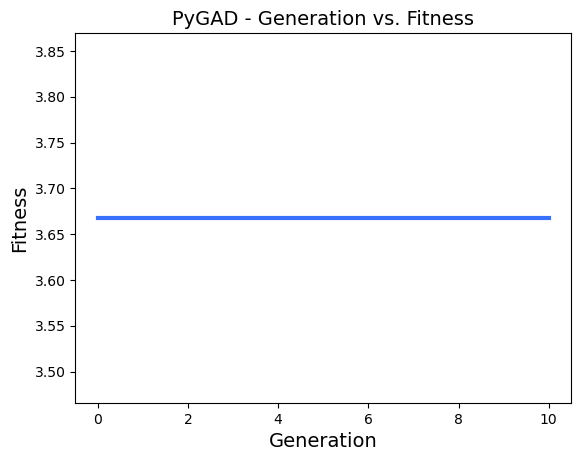

Parameters of the best solution : [ 207.92504846   25.14252507 2691.65424662 2024.1214525  2110.67016878]
Fitness value of the best solution = 3.667715172284133
Index of the best solution : 0
Best fitness value reached after 0 generations.


AttributeError: 'ThorlabsTLCamera' object has no attribute '__getstate__'

In [2]:
import pygad
import laserbeamsize as lbs
def get_quality_number(image_array):
    
    x, y, dx, dy, phi = lbs.beam_size(image_array)
    Ellipticity = min(dx,dy)/max(dx,dy) 
    threshold_up_area = (image_array >= np.max(image_array)/10)+0  #define a threshold area
    total_pixel = image_array.shape[0]*image_array.shape[1]   
    dispersion = total_pixel/np.sum(threshold_up_area) 
    quality_number = dispersion*Ellipticity
    return quality_number
   
def fitness_func(solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # solution is the PWM value for each channel
    solution = np.trunc(solution).astype(int)
    A = np.array([[solution[0]],[solution[1]],[solution[2]],[solution[3]],[solution[4]]])
   
    with open('PWM_test.csv', 'w', newline='') as file:
        mywriter = csv.writer(file, delimiter=',')
        mywriter.writerows(A)
    # wait
    time.sleep(0.1)    
    # take images
    cam.set_roi(370,950,240,840) # set ROI in the upper left corner
    images = cam.grab(1) # grab 1 frames
    # quality_number = get_quality_number(images)
    quality_number = get_quality_number(image_array)
    fitness = quality_number
    return fitness 

fitness_function = fitness_func

num_generations = 10 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it myself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# my custom initial population here can include: active zeros, defocus,cylindrical, spherical,etc.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = 5
mutation_percent_genes = 1
init_range_low = 0         
init_range_high = 4095

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
# solution, solution_fitness, solution_idx = ga_instance.best_solution()
best_solution = ga_instance.best_solution()
solution = best_solution[0]
solution_fitness = best_solution[1]
solution_idx = best_solution[2]

print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# prediction = numpy.sum(numpy.array(function_inputs)*solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

In [ ]:
## close camera and are ready to run again
cam.close()